In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import kagglehub
import os
path = kagglehub.dataset_download("bumba5341/advertisingcsv")
print("Files in dataset folder:", os.listdir(path))
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("No CSV file found!")
file_path = os.path.join(path, csv_files[0])
print(f"Using file: {file_path}")

100%|██████████| 2.26k/2.26k [00:00<00:00, 4.44MB/s]

Extracting files...
Files in dataset folder: ['Advertising.csv']
Using file: /root/.cache/kagglehub/datasets/bumba5341/advertisingcsv/versions/1/Advertising.csv


In [3]:
df = pd.read_csv(file_path)
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [4]:
print(df.tail())

     Unnamed: 0     TV  Radio  Newspaper  Sales
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [6]:
print(df.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [7]:
print(df.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


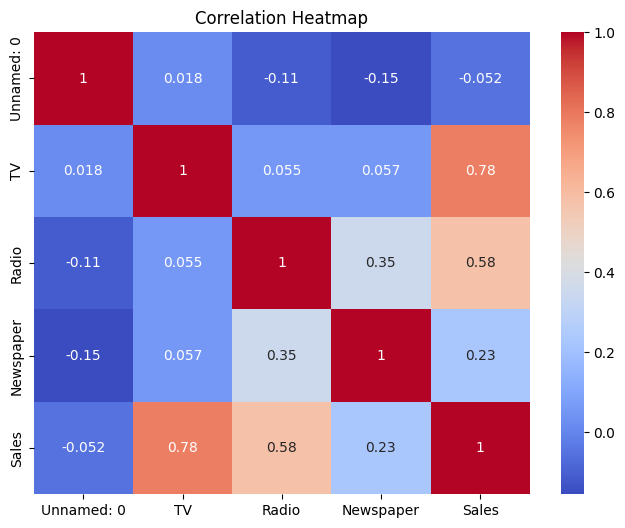

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

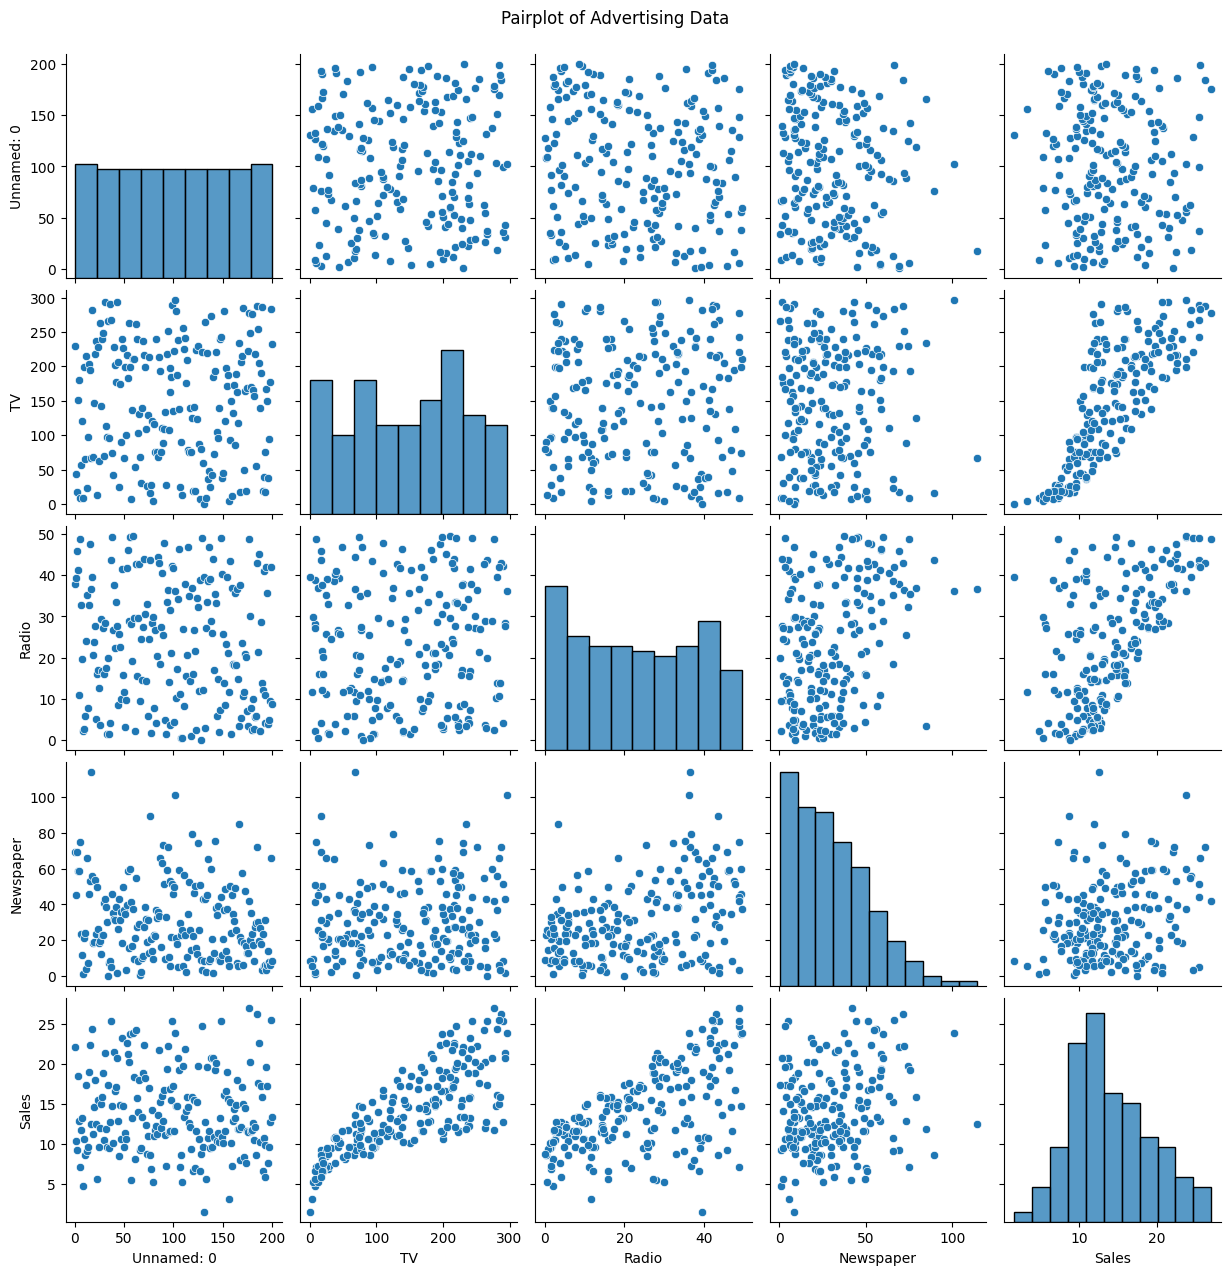

In [9]:
sns.pairplot(df)
plt.suptitle("Pairplot of Advertising Data", y=1.02)
plt.show()

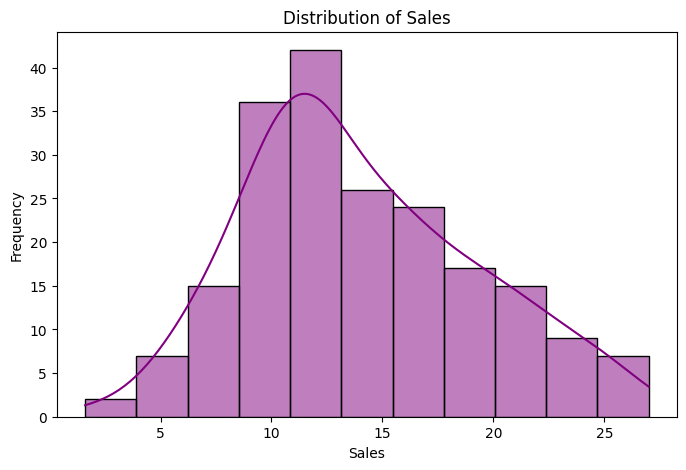

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], kde=True, color="purple")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

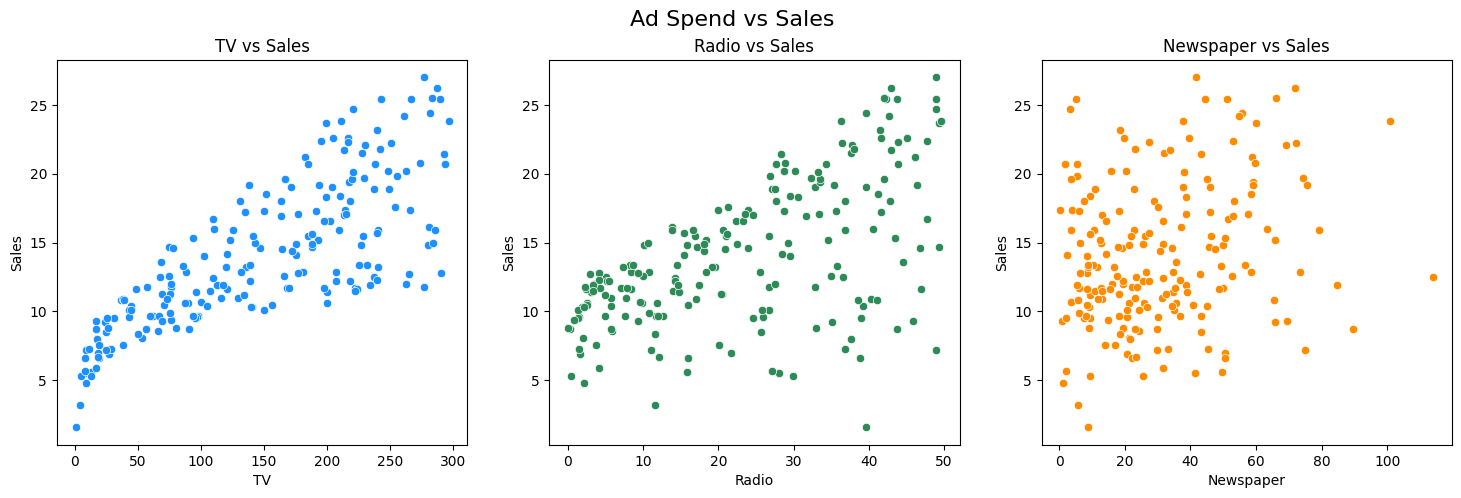

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x="TV", y="Sales", ax=axs[0], color="dodgerblue")
axs[0].set_title("TV vs Sales")

sns.scatterplot(data=df, x="Radio", y="Sales", ax=axs[1], color="seagreen")
axs[1].set_title("Radio vs Sales")

sns.scatterplot(data=df, x="Newspaper", y="Sales", ax=axs[2], color="darkorange")
axs[2].set_title("Newspaper vs Sales")

plt.suptitle("Ad Spend vs Sales", fontsize=16)
plt.show()

In [12]:
df = df.fillna(df.mean(numeric_only=True))
df_encoded = pd.get_dummies(df, drop_first=True)

print("\nColumns after encoding:")
print(df_encoded.columns)

target_col = "Sales"

if target_col not in df_encoded.columns:
    raise ValueError(f"No '{target_col}' column found!")


Columns after encoding:
Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [13]:
X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 3.20
RMSE: 1.79
R² Score: 0.90


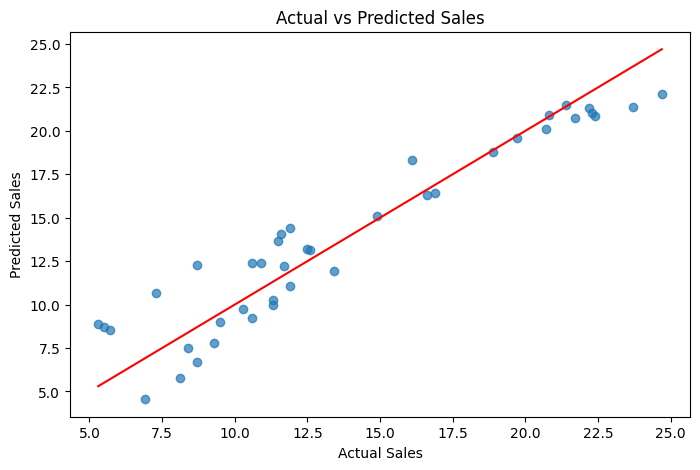

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

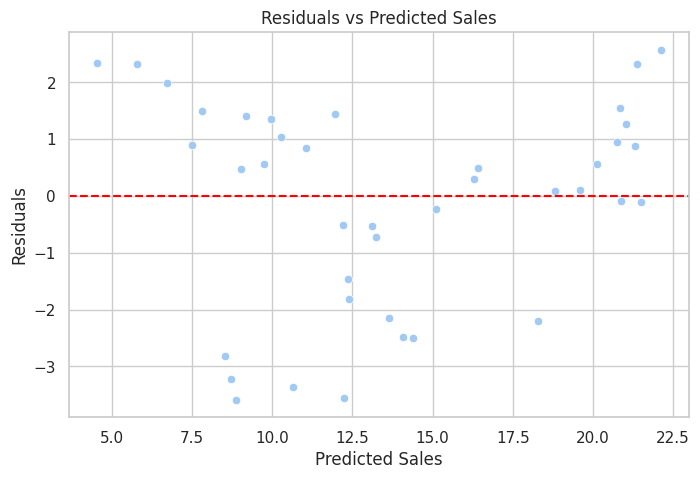

In [21]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
sns.set_theme(style="whitegrid", palette="pastel")
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Sales")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.show()